In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

def plot_spider(data=None, labels=None, backgr_scale=1.3):
    """_summary_

        data : input data, each yeo7net mean value, 1D vector
        labels : Yeo7net network name
        backgr_scale : set size of bacground spider
    """
    
    proportions = data                                                              # input data
    labels = labels                                                                 # label, text
    N = len(proportions)                                                            # Set number of vertices 
    proportions = np.append(proportions, 1)                                         # add intial vertex to close the spider plot

    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)                            # Set each equal-point coordinate
    x = np.append(np.sin(theta), 0)                                                 # Set x axis coordiation, No modification !!
    y = np.append(np.cos(theta), 0)                                                 # Set y axis coordiation, No modification !

    backgr_scale = backgr_scale                                                     # Set Background shape size scale 
    x_backgr = x*backgr_scale
    y_backgr = y*backgr_scale

    triangles = [[N, i, (i + 1) % N] for i in range(N)]
    triang_backgr = tri.Triangulation(x_backgr, y_backgr, triangles)                # Set background triangular grid 
    triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)  # Set input data triangular grid 

    triang_backgr2 = tri.Triangulation(x_backgr*0.25, y_backgr*0.25, triangles)     # Set background triangular grid 
    triang_backgr3 = tri.Triangulation(x_backgr*0.5, y_backgr*0.5, triangles)       # Set background triangular grid 
    triang_backgr4 = tri.Triangulation(x_backgr*0.75, y_backgr*0.75, triangles)     # Set background triangular grid 
    # triang_backgr5 = tri.Triangulation(x_backgr*0.33, y_backgr*0.33, triangles)   # Set background triangular grid 

    cmap = plt.cm.plasma  # or plt.cm.hsv ?                                         # Set colormap 
    colors = np.linspace(0, 1, N + 1)

    plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)   # plot
    plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)
    plt.triplot(triang_backgr2, color='white', lw=2, linestyle = ':')
    plt.triplot(triang_backgr3, color='black', lw=2, linestyle = ':')
    plt.triplot(triang_backgr4, color='white', lw=2, linestyle = ':')
    # plt.triplot(triang_backgr5, color='black', lw=2, linestyle = ':')
    plt.triplot(triang_backgr, color='white', lw=2.2)

    
    if labels is not None:
        for label, color, xi, yi in zip(labels, colors, x_backgr, y_backgr):        # Set text label position
            plt.text(xi * 1.05, yi * 1.05, label,  # color=cmap(color),
                    ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
                    va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center',
                    fontsize=15)
    plt.axis('off')
    plt.gca().set_aspect('equal')
    plt.show()

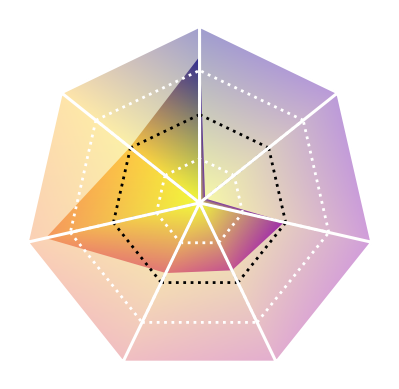

In [ ]:
data = LatEigen_ctx_Groupmean[:, 0]
data_yeo = np.array([data[Schaefer300Toyeo7_idx==i].mean() for i in range(Schaefer300Toyeo7_idx.max()+1)])
plot_spider(data=(data_yeo-(-3)), labels=None, backgr_scale=6)

In [ ]:
print(data_yeo)
print(data_yeo-(-3))

[ 1.94103711 -2.78119877 -0.07742431 -0.47907535 -0.37795018  2.32715743
  0.01019531]
[4.94103711 0.21880123 2.92257569 2.52092465 2.62204982 5.32715743
 3.01019531]
